<div class="alert alert-block alert-info">
<font size="5">
<center><b> ПРИНЯТИЕ РЕШЕНИЯ В БИЗНЕСЕ С ПОМОЩЬЮ A/B-ТЕСТА</b></center>
</font>
    </div> 

<span class="mark">**Описание проекта**</span>

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.

Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

<span class="mark">**Часть 1. Приоритизация гипотез.**</span>

В файле `/datasets/hypothesis.csv` 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами `Reach`, `Impact`, `Confidence`, `Effort`.

<span class="mark">**Задача**</span>

- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

<span class="mark">**Описание данных**</span>

Файл /datasets/hypothesis.csv. Скачать датасет

- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

<span class="mark">**Часть 2. Анализ A/B-теста**</span>

Вы провели A/B-тест и получили результаты, которые описаны в файлах `/datasets/orders.csv и /datasets/visitors.csv.`

<span class="mark">**Задача**</span>

Проанализируйте A/B-тест:

1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
4. Постройте график кумулятивного среднего количества заказов по группам. Сделайте выводы и предположения.
5. Постройте график относительного изменения кумулятивного среднего количества заказов группы B к группе A. Сделайте выводы и предположения.
6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
10. Посчитайте статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным. Сделайте выводы и предположения.
11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
12. Посчитайте статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным. Сделайте выводы и предположения.
13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
14. Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

<span class="mark">**Описание данных**</span>

Файл /datasets/orders.csv. Скачать датасет
- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv. Скачать датасет
- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста


# Выполнение проекта

## Загрузим данные и подготовим их к анализу

Загрузим данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

Изучим данные и выполним предобработку. 

In [1]:
# Загружаем библиотеки
import pandas as pd
import numpy as np
import math as mth
from scipy import stats as stats
from datetime import datetime, timedelta
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters


### Откроем файл `/datasets/hypothesis.csv` с данными и изучим общую информацию

In [2]:
hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')

In [3]:
# Изучим таблицу
hypothesis.head(5)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


In [4]:
# Заменим названия столбцов к нижнему регистру
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis.head(3)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3


In [5]:
# Изучаем столбцы и их типы
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [6]:
# Проверим наличие пропусков в каждом столбце(%)
pd.DataFrame(round(hypothesis.isna().mean()*100,)).style.background_gradient('BuPu')

,0
hypothesis,0.000000
reach,0.000000
impact,0.000000
confidence,0.000000
efforts,0.000000


In [7]:
# Проверим наличие дубликатов
hypothesis.duplicated().sum()

0

### Откроем файл `datasets/orders.csv` с данными и изучим общую информацию

In [8]:
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')

In [9]:
# Изучим таблицу
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [10]:
# Изучаем столбцы и их типы
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [11]:
# преобразуем данные о времени для дальнейших расчётов
orders['date'] = pd.to_datetime(orders['date'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [12]:
# Проверка пользователей на дублирование
groupA = orders.query('group == "A"')
groupB = orders.query('group == "B"')
spy_agent = set(groupA['visitorId']).intersection(set(groupB['visitorId']))

In [13]:
# Удаляем пользовалетей, которые попали в обе группы
orders = orders.query('visitorId not in @spy_agent').reset_index()

In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   index          1016 non-null   int64         
 1   transactionId  1016 non-null   int64         
 2   visitorId      1016 non-null   int64         
 3   date           1016 non-null   datetime64[ns]
 4   revenue        1016 non-null   int64         
 5   group          1016 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 47.8+ KB


In [15]:
# Проверим наличие пропусков в каждом столбце(%)
pd.DataFrame(round(orders.isna().mean()*100,)).style.background_gradient('BuPu')

,0
index,0.000000
transactionId,0.000000
visitorId,0.000000
date,0.000000
revenue,0.000000
group,0.000000


In [16]:
# Проверим наличие дубликатов
orders.duplicated().sum()

0

#### Откроем файл `/datasets/visitors.csv` с данными и изучим общую информацию

In [17]:
visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

In [18]:
# Изучим таблицу
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [19]:
# Изучаем столбцы и их типы
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [20]:
# преобразуем данные о времени для дальнейших расчётов
visitors['date'] = pd.to_datetime(visitors['date'])
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [21]:
# Проверим наличие пропусков в каждом столбце(%)
pd.DataFrame(round(visitors.isna().mean()*100,)).style.background_gradient('BuPu')

,0
date,0.000000
group,0.000000
visitors,0.000000


In [22]:
# Проверим наличие дубликатов
visitors.duplicated().sum()

0

**`ВЫВОД`**: 
<div style="border:solid orange 2px; padding: 20px"> 

В исходном датасете 'hypothesis' 9 строк и 5 столбцов, 'orders' 1197 строк и 5 столбца и 'visitors' 62 строк и 3 столбца.
                 
    
После того, как изучили датасеты, выявили следующие первичные отклонения:
    
<span class="mark">'hypothesis'</span>   
1) Заменим названия столбцов к нижнему регистру.
    
<span class="mark">'orders'</span>
1) `date`- не соответствует тип колонки object. Поменяли на datetime \

    
<span class="mark">'visitors'</span> 
1) `date`- не соответствует тип колонки object. Поменяли на datetime


Пропуски, дубликаты не выявлены.    
</div>

### Приоритизация гипотез

**RICE** — это метод приоритизации гипотез продукта. Аббревиатура включает 4 фактора:

- **Reach** — это охват. Уровень охвата измеряется количеством людей/событий за определенный период времени. Скольких пользователей затронет изменение, которое вы хотите внести?
- **Impact** — влияние. Влияние показывает какой вклад приносит эта фича продукту. Насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта?
- **Confidence** — уверенность в вашей оценке охвата, влияния и трудозатрат. Насколько вы уверены, что это изменение повлияет на пользователей именно так?
- **Effort** — трудозатраты. Трудозатраты оцениваются как количество «человеко-месяцев», недель или часов, в зависимости от потребностей. Сколько стоит протестировать эту гипотезу?

Чтобы получить оценку по `RICE`, вам необходимо умножить факторы `Reach`, `Impact`, `Confidence` и разделить на `Effort`.

**ICE** — второй метод, который был придуман для приоретизации гипотез, которые непосредственно касаются роста компании.

Чтобы получить оценку по `ICE`, вам необходимо умножить факторы  `Impact`, `Confidence` и разделить на `Effort`.







#### Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [23]:
hypothesis['ICE'] = round((hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts'],2)

pd.options.display.max_colwidth = 400
hypothesis.sort_values(by='ICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


<span class="mark">**Наблюдение:**</span>  Более перспективные гипотезы по ICE: 8, 0 и 7

#### Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [24]:
hypothesis['RICE']= (hypothesis['reach']*hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']
hypothesis.sort_values(by='RICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


<span class="mark">**Наблюдение:**</span> Более перспективные гипотезы по RICE: 7, 2 и 0

<p></p>

<div style="border:solid green 2px; padding: 20px">

**ВЫВОД:** Согласно двум методам ICE и RICE, приоритетность гипотез отличается из-за ключевого фактора REACH, который имел высокие показатели при расчете ICE. В методе ICE лидерами стали: 8,0,7, а в методе RICE: 7,2,0.
    Для роста бизнеса важен охват, поэтому наиболее приоритетными гипотезами для тестирования будут 7 и 2. 
</div>


### Анализ A/B-теста

Проанализируем A/B-тест:

#### Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.

Рассчитаем усредненную (медианную) выручку за день в каждой группе, чтобы иметь представление сколько выручка за день

In [25]:
orders.groupby(['date','group'])['revenue'].sum().groupby('group').median()

group
A     92365.0
B    107340.0
Name: revenue, dtype: float64

In [26]:
# Создадим датафрейм datesGroups с уникальными парами значений 'date' и 'group', таблицы orders. 
#Удалим дубликаты методом drop_duplicates()

datesGroups = orders[['date','group']].drop_duplicates() 

Объявим переменную `ordersAggregated`, содержащую:
- дату;
- группу A/B-теста;
- число уникальных заказов в группе теста по указанную дату включительно;
- число уникальных пользователей, совершивших хотя бы 1 заказ в группе теста по - указанную дату включительно;
- суммарную выручку заказов в группе теста по указанную дату включительно.

Отсортируем по столбцам 'date', 'group' в указанном порядке.


In [27]:
# Объявите переменную ordersAggregated
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
                                    .agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1)\
                                    .sort_values(by=['date','group'])

Объявим переменную `visitorsAggregated`, содержащую:
- дату;
- группу A/B-теста;
- количество уникальных посетителей в группе теста по указанную дату включительно.

Отсортируем по столбцам 'date', 'group' в указанном порядке.

In [28]:
#Объявите переменную visitorsAggregated
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                                       .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)\
                                       .sort_values(by=['date','group'])


Определим переменную `cumulativeData`, объединив `ordersAggregated` и `visitorsAggregated` по колонкам 'date', 'group' методом merge()

In [29]:
# Определите переменную cumulativeData
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5) 

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


Объявим переменные `cumulativeRevenueA` и `cumulativeRevenueB`, в которых сохраните данные о датах, выручке и числе заказов в группах A и B.

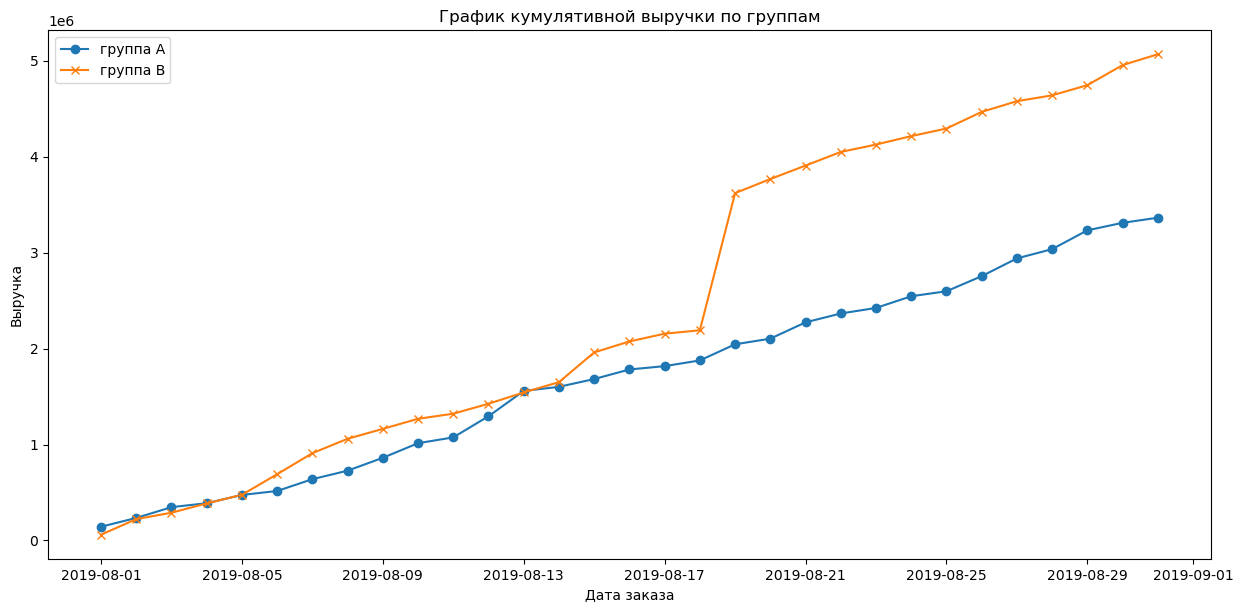

In [30]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
figure(figsize=(15, 7), dpi=100)
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='группа A', marker='o')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='группа B', marker='x')
plt.legend()
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата заказа')
plt.ylabel('Выручка')
plt.show()

<span class="mark">**Наблюдение:**</span> В середине теста группа В вырвался вперед и продолжил лидировать весь остаток теста. Похоже, что аномально большие заказы повлияли на результат. При заключительном анализе возможно стоит их удалить.

Найдем аномальное значение за 19 августа 2019 года, когда произошел резкий скачок.

In [31]:
print('Медианное значение одного заказа 19 августа =',orders.query(' date == "2019-08-19" ')['revenue'].median())
orders.query(' date == "2019-08-19" ').sort_values(by='revenue', ascending=False).head(8)

Медианное значение одного заказа 19 августа = 2578.0


,index,transactionId,visitorId,date,revenue,group
365,425,590470918,1920142716,2019-08-19,1294500,B
453,530,3970235543,2912540959,2019-08-19,43990,A
450,527,1570513684,2837914161,2019-08-19,33405,B
361,421,3765974140,1357170471,2019-08-19,31680,A
393,461,2683113224,154576532,2019-08-19,26550,B
316,368,3268879337,2536252163,2019-08-19,20026,B
314,366,2037051350,1957949546,2019-08-19,16770,A
395,463,4170537404,290022471,2019-08-19,16480,B


**19 августа был заказ на 1 294 500 рублей, что превысило медианное значение в 490 раз. Как раз данный заказ можно считать выбросом.**

#### Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.

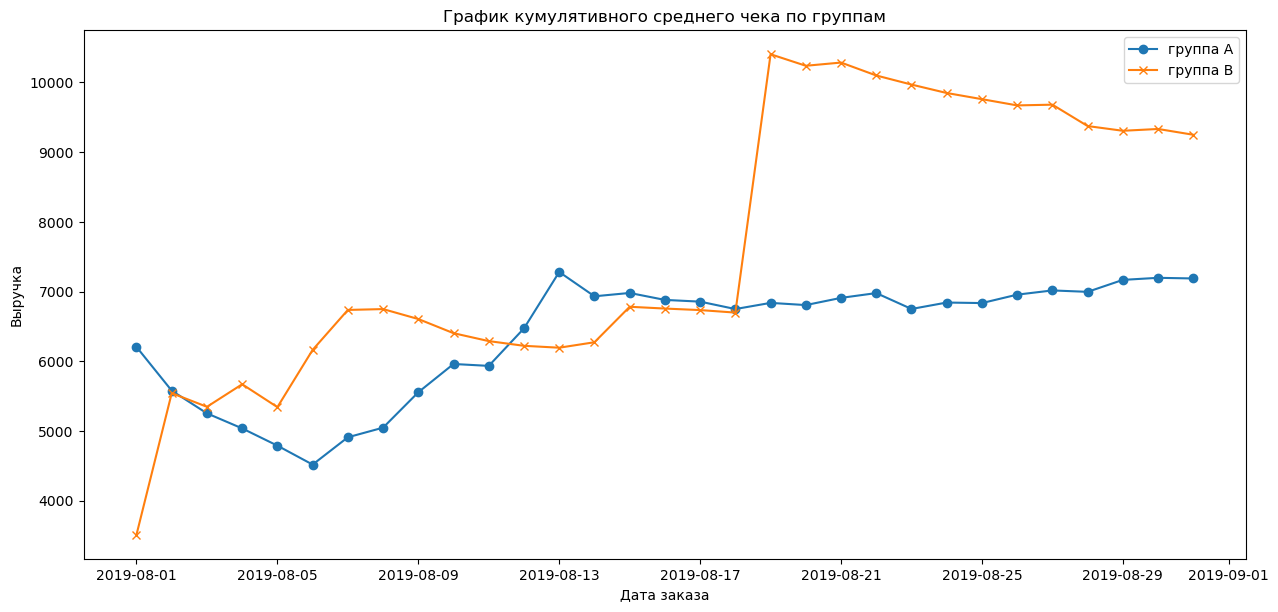

In [32]:
# Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов
figure(figsize=(15, 7), dpi=100)
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='группа A', marker='o')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='группа B', marker='x')
plt.legend()
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата заказа')
plt.ylabel('Выручка')

plt.show()

<span class="mark">**Наблюдение:**</span> Кумулятивное значение среднего чека по сегментам имеет высокую волатильность. Требуется дополнительный анализ выбросов, особенно в середине теста, которые так сильно искажают результаты.

#### Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.

Создадим переменную **`mergedCumulativeRevenue`**, объединив таблицы cumulativeRevenueA и cumulativeRevenueB методом merge() так, чтобы она содержала столбцы: ['date', 'revenueA', 'revenueB', 'ordersA', 'ordersB']. 

Добавим пунктирную линию оси X (значение оси Y = 0) методом plt.axhline().

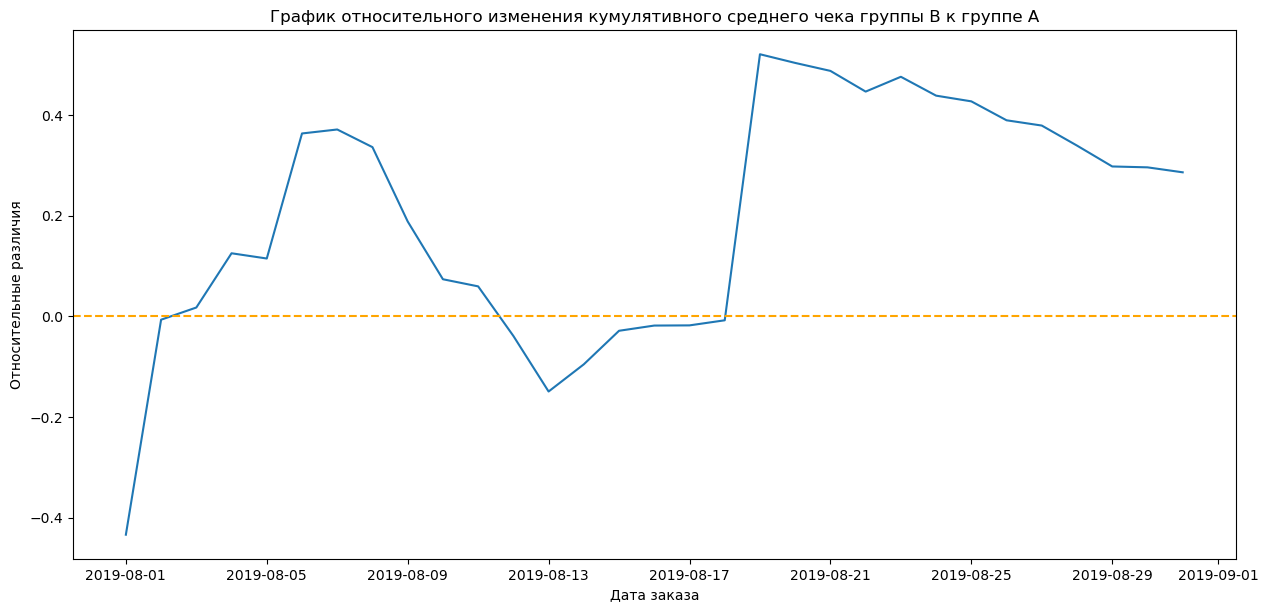

In [33]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
figure(figsize=(15, 7), dpi=100)
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])\
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='orange', linestyle='--') 
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата заказа')
plt.ylabel('Относительные различия')

plt.show()

<span class="mark">**Наблюдение:**</span> Чтобы нагляднее увидеть разницу между группами, мы построили график относительного различия и видим, что группа В лучше группы А. Результаты теста значительно и резко менялись в несколько дат. Видимо, именно тогда были совершенны анномальные заказы.

#### Построим график кумулятивного среднего количества заказов по группам Сделаем выводы и предположения.

Добавим в `cumulativeData` столбец 'aveg_order' c отношением числа заказов к количеству пользователей в указанной группе в указанный день.

Объявим переменные cumulativeDataA и cumulativeDataB, в которых сохраним данные о заказах в сегментах A и B соответственно.

Text(0, 0.5, 'Среднее количество заказов')

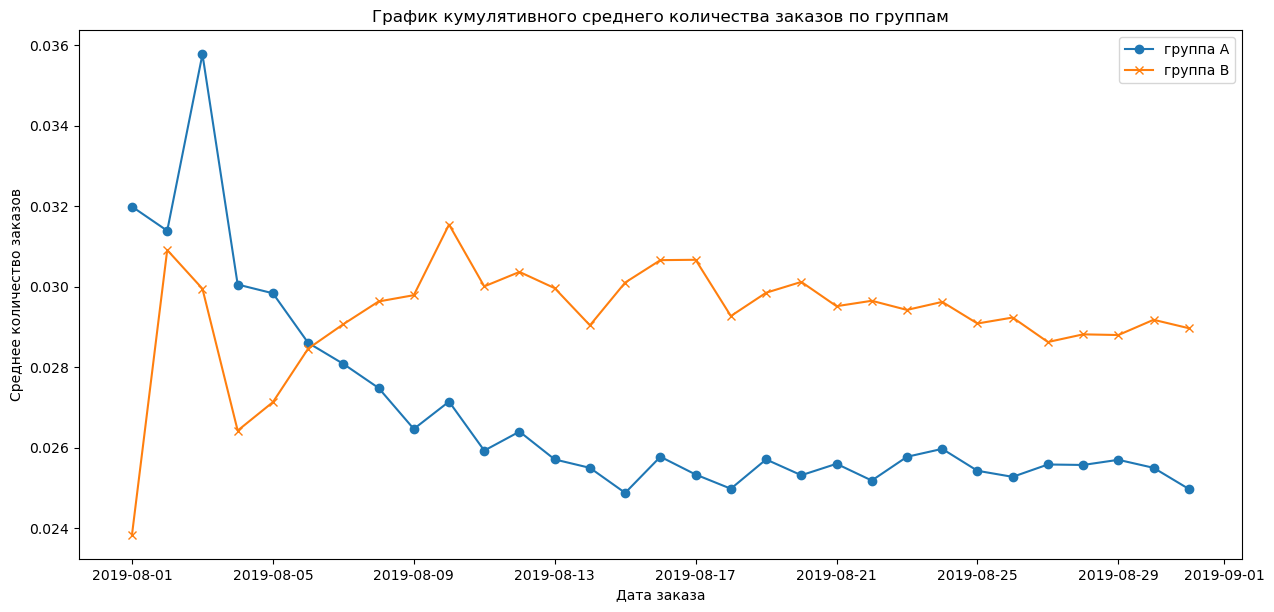

In [34]:
# считаем кумулятивную среднюю кол-во заказов
cumulativeData['aveg_order'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
figure(figsize=(15, 7), dpi=100)
plt.plot(cumulativeDataA['date'], cumulativeDataA['aveg_order'], label='группа A', marker='o')
plt.plot(cumulativeDataB['date'], cumulativeDataB['aveg_order'], label='группа B', marker='x')
plt.legend()
plt.title('График кумулятивного среднего количества заказов по группам')
plt.xlabel('Дата заказа')
plt.ylabel('Среднее количество заказов')


<span class="mark">**Наблюдение:**</span> В начале теста группа А имела выше среднее значение по отношению к группе В при высоких колебаниях. После 2019-08-09 наблюдаются незначительные колебания в двух группах, но явным лидером стала группа В. 

#### Построим график относительного изменения кумулятивного среднего количества заказов группы B к группе A. Сделаем выводы и предположения.

Создадим переменную **`mergedCumulativeAverOrd`**, объединив таблицы cumulativeRevenueA и cumulativeRevenueB методом merge() так, чтобы она содержала столбцы: ['date', 'aveg_orderA', 'aveg_orderB']. 

Добавим пунктирную линию оси X (значение оси Y = 0) методом plt.axhline().

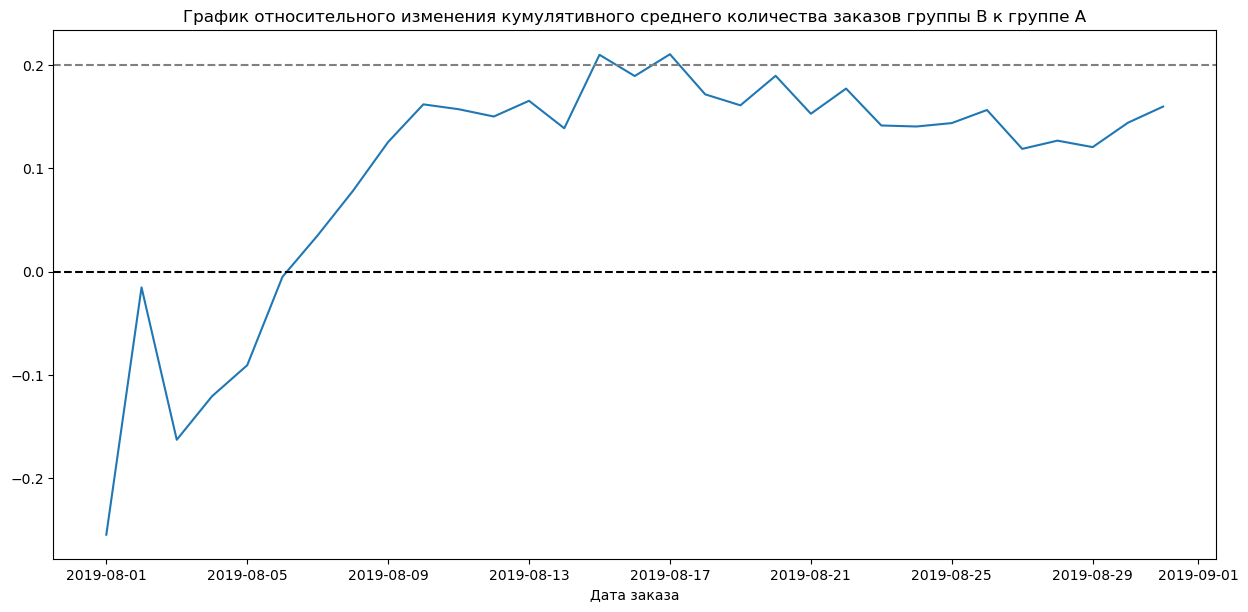

In [35]:
mergedCumulativeAverOrd = cumulativeDataA[['date','aveg_order']].merge(cumulativeDataB[['date','aveg_order']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
figure(figsize=(15, 7), dpi=100)
plt.plot(mergedCumulativeAverOrd['date'], mergedCumulativeAverOrd['aveg_orderB']/mergedCumulativeAverOrd['aveg_orderA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')

plt.title('График относительного изменения кумулятивного среднего количества заказов группы B к группе A')
plt.xlabel('Дата заказа')
plt.show()

<span class="mark">**Наблюдение:**</span> В начале теста группа В лидирует относительному среднему количеству заказов, но с середины теста показатель стал снижаться.

#### Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.

Построим диаграмму методом scatter().

Значения для вертикальной оси возьмите из столбца 'orders' датафрейма ordersByUsers.

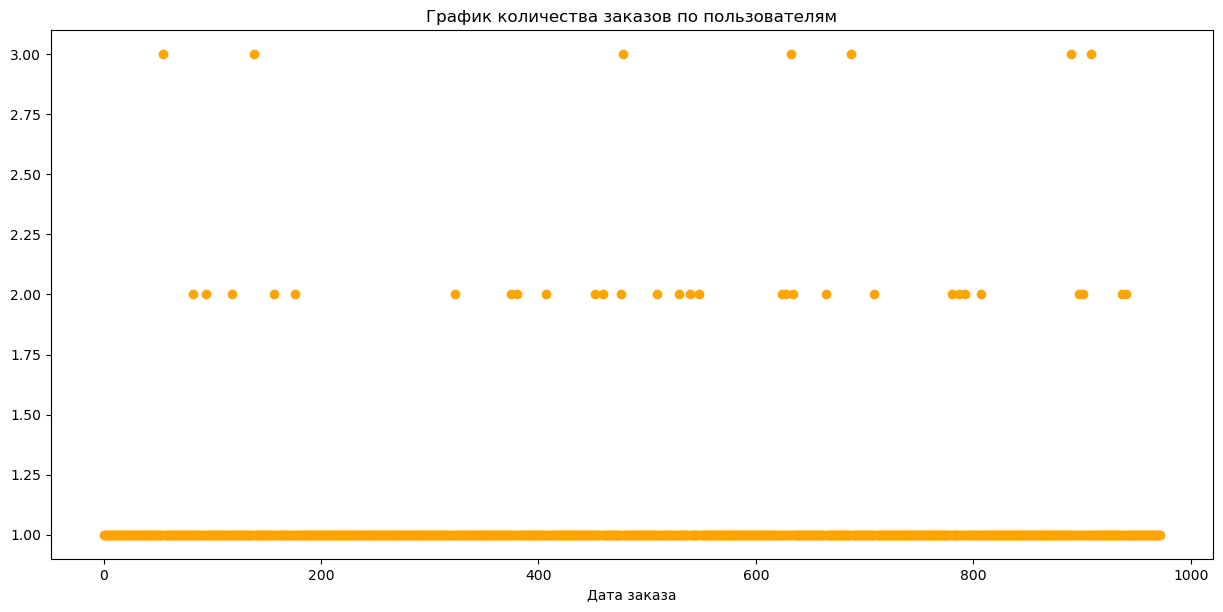

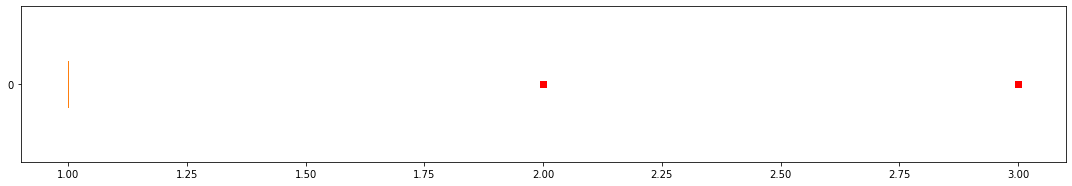

In [36]:
# Метод .groupby('...', as_index=False) сгруппирует заказы по пользователям
# Метод .agg({'...' : 'nunique',}) подсчитает число уникальных заказов по сгруппированным данным
# Метод .sort_values(by='...',ascending=False) отсортирует датафрейм по значению в столбце

ordersByUsers = (
                orders.groupby('visitorId', as_index=False)
                .agg({'transactionId' : 'nunique'})
)
ordersByUsers.columns= ['visitorId','orders']


# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))

figure(figsize=(15, 7), dpi=100)
plt.scatter(x_values, ordersByUsers['orders'], color='orange') 
plt.title('График количества заказов по пользователям')
plt.xlabel('Дата заказа')
plt.show()

# Построим диаграмму размаха("ящик с усами")
fig = plt.figure(figsize=(15, 5))
ax = plt.subplot(2, 1,2)

ax.boxplot(ordersByUsers['orders'], False, sym='rs', vert=False, whis=0.5, positions=[0], widths=[0.3])

plt.tight_layout()
plt.show()

Построим гистограмму распределения числа заказов по пользователям методом hist().

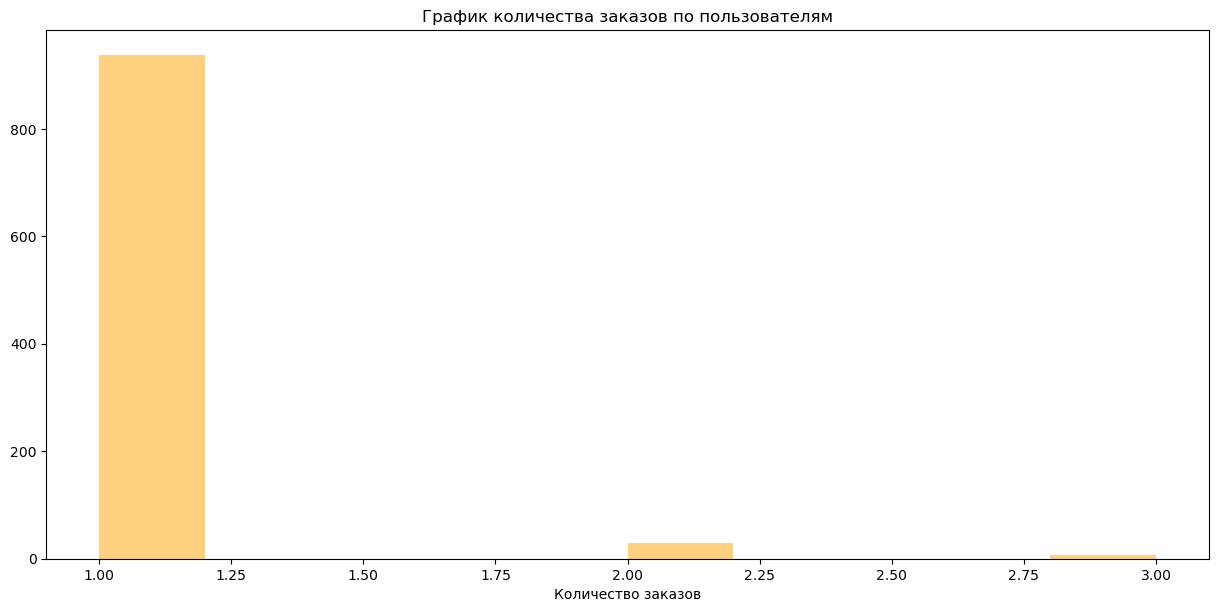

In [37]:
figure(figsize=(15, 7), dpi=100)
plt.hist(ordersByUsers['orders'], alpha=0.5, color='orange')
plt.title('График количества заказов по пользователям')
plt.xlabel('Количество заказов')
plt.show()

<span class="mark">**Наблюдение:**</span> Большенство пользователей совершили всего 1 заказ. Пользователей, заказавших более двух раз, совсем мало. Они вполне могут быть аномальными. 

#### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберим границу для определения аномальных пользователей.

In [38]:
# Метод np.percentile('column', [percentile1, percentile2, percentile3]) находит перцентили.

np.percentile(ordersByUsers['orders'], [95, 99]) 

array([1., 2.])

<span class="mark">**Наблюдение:**</span> Не более 5% пользователей совершали больше двух заказов.И не более 1% пользователей- больше четырех заказов. 

Более детально посмотрим на диапозон процентиля с 95 по 99

In [39]:
np.percentile(ordersByUsers['orders'], [95, 96, 97,98, 99]) 

array([1., 1., 2., 2., 2.])

<span class="mark">**Наблюдение:**</span> Теперь точно видно, что только 2% делают более 3х заказов- считаем их выбросами.

#### Построим точечный график стоимостей заказов. Сделаем выводы и предположения.

Построим диаграмму методом scatter().

Значения для вертикальной оси возьмите из столбца 'revenue' датафрейма orders.

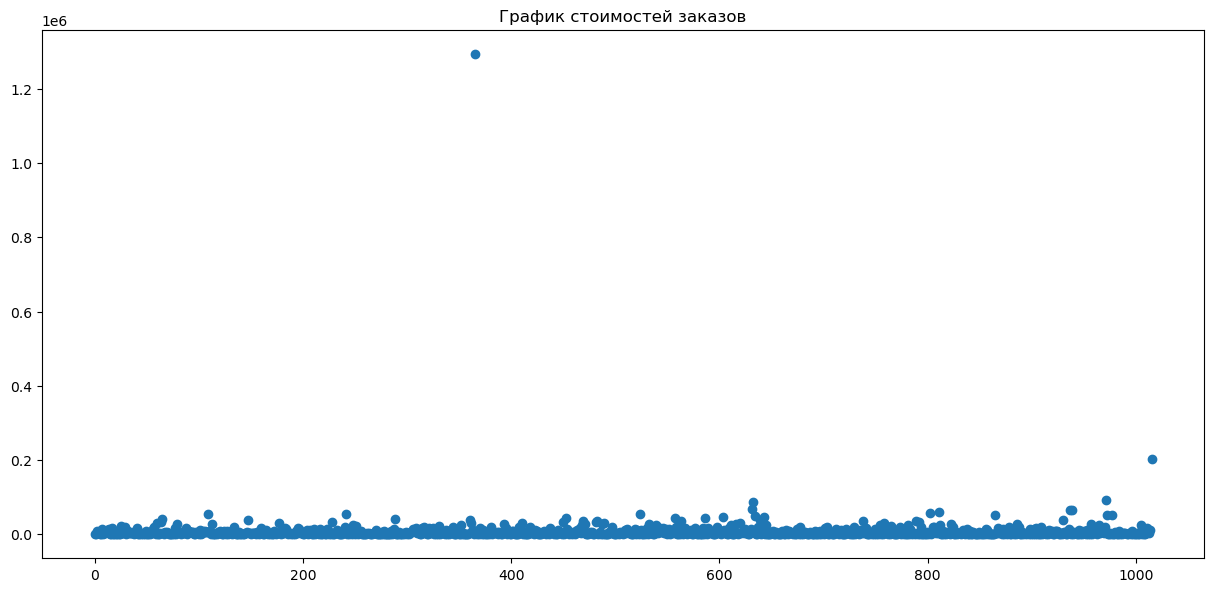

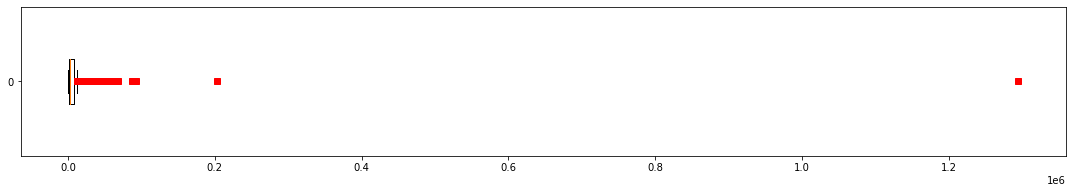

In [40]:
x_values = pd.Series(range(0, len(orders['revenue'])))


figure(figsize=(15, 7), dpi=100)
plt.scatter(x_values, (orders['revenue']))
plt.title('График стоимостей заказов')

plt.show()

# Построим диаграмму размаха("ящик с усами")
fig = plt.figure(figsize=(15, 5))
ax = plt.subplot(2, 1,2)

ax.boxplot(orders['revenue'], False, sym='rs', vert=False, whis=0.5, positions=[0], widths=[0.3])

plt.tight_layout()
plt.show()

Увеличим масштаб для удобства просмотра.

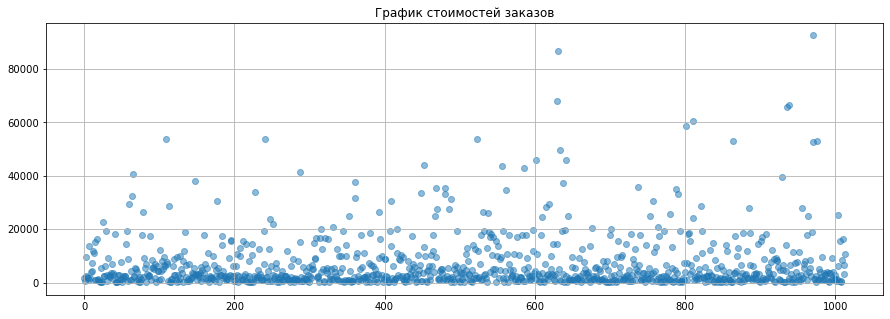

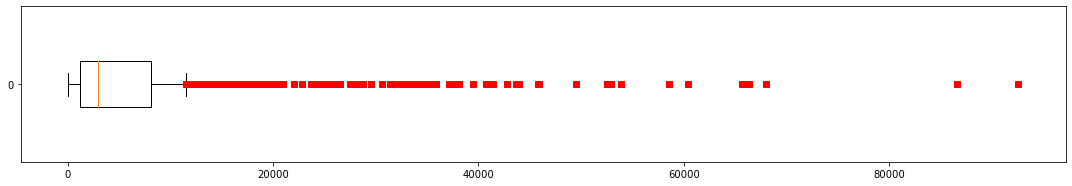

In [41]:
gen_orders = orders[orders['revenue']<=195000]['revenue']
xn_values = pd.Series(range(0,len(gen_orders)))


plt.figure(figsize=(15,5))
plt.grid()
plt.title('График стоимостей заказов')
plt.scatter(xn_values, gen_orders, alpha=0.5);

# Построим диаграмму размаха("ящик с усами")
fig = plt.figure(figsize=(15, 5))
ax = plt.subplot(2, 1,2)

ax.boxplot(gen_orders, False, sym='rs', vert=False, whis=0.5, positions=[0], widths=[0.3])

plt.tight_layout()
plt.show()

<span class="mark">**Наблюдение:**</span> Заказов стоимостью более 100 000 рублей очень мало. Есть 2 выброса 200 000 р и более 1 200 000 рублей. Заказ на стоимость выше 1 200 000 р выблядит аномально. 

#### Посчитаем  95-й и 99-й перцентили стоимости заказов. Выберим границу для определения аномальных заказов.

In [42]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

<span class="mark">**Наблюдение:**</span> Не более, чем у 5% заказов чек дороже 26 785р. И не больше, чем у 1% заказов- дороже 53 904 р.  

#### Посчитаем статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным. Сделаем выводы и предположения.

После того, как мы оценили результаты А/В- теста визуально выяснили, что в данных есть аномании и нашли их границу. Подготовим данные для расчета p-value 

Для этого мы:
- определим количество пользователей ежедневно в переменной `visitorsADaily/visitorsBDaily` и с накомлением  `visitorsACummulative/visitorsBCummulative` по каждой группе;
- определим количество заказов ежедневно в переменной `ordersADaily/ordersBDaily` и с накомлением  `ordersACummulative/ordersBCummulative` по каждой группе;
- созданим новый датафрейм `data`, объеденив с помощью метода `merge` все выше указанные данные по двум группам.

Сформулируем гипотезы. 

- Ho: различий в среднем количестве заказов между группами нет. 
- Ha: различия в среднем между группами есть.


In [43]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]
    .agg({'date': 'max', 'visitorsPerDateA': 'sum'}), axis=1,)


visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]
    .agg({'date': 'max', 'visitorsPerDateB': 'sum'}), axis=1,)

visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']]
    .agg({'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}),axis=1,)\
    .sort_values(by=['date'])

ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)


Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['visitorId, 'orders']. 
В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 


In [44]:

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

In [45]:
# Создадим объект pd.Series нужной длины:

pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')

[ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')]


[0      1
 1      1
 2      1
 3      1
 4      1
       ..
 440    1
 441    1
 442    1
 443    1
 444    1
 Name: orders, Length: 445, dtype: int64,
 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 18286    0
 18287    0
 18288    0
 18289    0
 18290    0
 Name: orders, Length: 18291, dtype: int64]

Объявим переменные `sampleA` и `sampleB`, в которых пользователям с заказами будет соответствовать число заказов пользователя.

In [46]:
#Список индексов создали функцией np.arange(). Она работает так же, как функция range(), только создаёт массив индексов в формате np.array, который требуется в pd.Series.
# В Pandas последовательности объединяют функцией pd.concat() (от англ. concatenate, «сцеплять»). Сперва ей передают то, что объединяют — в нашем случае список из первой и второй части:
# Дальше передадим аргумент, сообщающий, что объекты Series нужно объединить по строкам (то есть записать подряд): pd.concat([...], axis=0). То же делаем для sampleB и получаем:

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)


ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)



Посчитаем статистическую значимость различия среднего количества заказов, применив тест Манна-Уитни.

In [47]:
print("alpha =",0.05)
print("p-value ={0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

alpha = 0.05
p-value =0.01102
Относительный показатель 'B' и 'A' = 0.160


<span class="mark">**Наблюдение:**</span> P-value  меньше 0.05, поэтому нулевую гипотезу отвергаем. Анализ "сырых" данных показал, что в средних количествах заказов между группами есть статистически значемые различия. Относительный прирост среднего значения группы В к группе А равен 16%.

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.

In [48]:
print("alpha =",0.05)
print('p-value ={0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

alpha = 0.05
p-value =0.829
Относительный показатель 'B' и 'A' = 0.287


<span class="mark">**Наблюдение:**</span> P-value больше 0.05, поэтому нулевую гипотезу не отвергаем. Это говорит о том, что статистических значимых отличий в среднем чеке заказа между группами нет. 

#### Посчитаем статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным. Сделаем выводы и предположения.

Примем за аномальных пользователй тех, кто соверших более 2х заказов на сумму свыше 54 000 р. 

- сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 54 000 — usersWithExpensiveOrders. 
- объединим их в таблице abnormalUsers, удалим дубликаты, отсортируем по возрастанию.

In [49]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 54000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print("Всего странных пользователей =" ,len(abnormalUsers)) 

937    148427295
33     249864742
58     611059232
811    887908475
632    888512513
Name: visitorId, dtype: int64
Всего странных пользователей = 16


- создадим переменные `sampleAFiltered` и `sampleBFiltered`, в которых сохраните очищенные данные о заказах — не включая аномальных пользователей.

- выведим p-value для сравнения среднего между очищенными группами.

In [50]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print("alpha =",0.05)
print('p-value = {0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

alpha = 0.05
p-value = 0.00702
Относительный показатель 'B' и 'A' = 0.189


<span class="mark">**Наблюдение:**</span> Как и в случаи с "сырыми" данными, статистическая значимость достигнута. Сегмент В значительно лучше сегмента А. А относительный показатель группы "B" над "A" равен 18,9% (выше, чем с «сырыми» данными - 16%)

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.

- выведим p-value для сравнения средних чеков между очищенными группами; 
- выведим относительный прирост среднего чека очищенной группы B

In [51]:
print("alpha =",0.05)
print(
    'p-value = {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительный показатель 'B' и 'A' = {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

alpha = 0.05
p-value = 0.788
Относительный показатель 'B' и 'A' = -0.032


<span class="mark">**Наблюдение:**</span> Различия между средними чеками групп статистически незначимы.  

#### Примем решение по результатам теста и объясните его. 
Варианты решений: 

1. Остановить тест, зафиксировать победу одной из групп. 
2. Остановить тест, зафиксировать отсутствие различий между группами. 
3. Продолжить тест.

**`ВЫВОДЫ:`**
<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid orange 2px; padding: 20px"> 
    
- Основным аномальным заказом оказался чек на 1,3 млн, что привел к отклонению среднего чека.
- Есть статистическое различие в среднем количестве заказов между группами как по сырым данным, так и после фильтрации аномалий.
- Нет статистических различий в среднем чеке между группами
- График относительного различия среднего чека показывает ухудшение результатов группы В. Различия в средних чеках групп A и B отстутствуют.



**С учетом вышесказанного, предлагается завершить тест, тк группа В даже при снижении среднего чека имеет результаты лучше группы А.**
</b><br>